# Pandas

Download the dataset.tsv file from the canvas.
### 1. Import the libraries

In [55]:
import pandas as pd
import re
import matplotlib.pyplot as plt
import seaborn as sns

### 2. Import the dataset

In [56]:
df = pd.read_table('dataset.tsv')

### 3. Print the first 50 entries

In [57]:
df[:50]

,order_id,quantity,product_name,option_description,product_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98
5,3,1,Chicken Bowl,"[Fresh Tomato Salsa (Mild), [Rice, Cheese, Sou...",$10.98
6,3,1,Side of Chips,NaN,$1.69
7,4,1,Steak Burrito,"[Tomatillo Red Chili Salsa, [Fajita Vegetables...",$11.75
8,4,1,Steak Soft Tacos,"[Tomatillo Green Chili Salsa, [Pinto Beans, Ch...",$9.25
9,5,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Pinto...",$9.25


### 4. Print the number of datapoints (rows) in the dataset?

In [58]:
len(df)

4622

### 5. Print the number of columns in the dataset?

In [59]:
len(df.columns)

5

###  7. Print the names of columns.

In [60]:
names = list(df.columns)
for name in names:
    print(name)

order_id
quantity
product_name
option_description
product_price


### 8. Print the most ordered product and it's count?
#### You have to only consider "product_name" column for this.
#### Count should reflect, for how many times the product was ordered across all the orders

In [61]:
orders_by_product = df.groupby('product_name').sum()
popular_products_sorted = orders_by_product.sort_values('quantity', ascending = False)
popular_products_sorted.drop(['order_id'], axis=1)[:1]

,quantity
product_name,
Chicken Bowl,761


### 9. Print the number of orders in total?
#### tip: Number of unique order_ids

In [62]:
df['order_id'].nunique()

1834

### 10. Print the most ordered product in the option_description column?
#### Only non NaN etries should be considerd
#### Discard the brakets and split by ",", create a dictionary where keys are items (which you get after spliting) and values are their respective counts across all the orders


In [63]:
def dataframe_from_series_of_lists(series):
    """Convert pandas series of lists to single dataframe.

    Algorithm:
    1. Loop through every list in series.
    2. Remove [ and ] from list.
    3. Split list by ,
    4. Append values to dataframe.

    Args:
        series (pandas Series): [desc
    """
    new_df = pd.DataFrame()
    for row in series:
        a = row.replace('[', '')
        b = a.replace(']', '')
        c = b.split(', ')
        new_df = new_df.append(pd.DataFrame(c))
    return(new_df)

options = df.option_description.dropna()
df_options = dataframe_from_series_of_lists(options)
popular_options_sorted = df_options.value_counts()
popular_options_sorted[:1]

Rice    2389
dtype: int64

### 11. Print the number of products orderd in total?
#### Either summation of all quantities (sum of quantity column)
#### Or 
#### Summation of the count of products( considring only counting product once per order)

In [64]:
total = df["quantity"].sum()
total

4972

### 12. Cast the product price to float type

In [65]:
df.product_price = df.product_price.replace('[\$,]', '', regex=True).astype(float)
df

,order_id,quantity,product_name,option_description,product_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,2.39
1,1,1,Izze,[Clementine],3.39
2,1,1,Nantucket Nectar,[Apple],3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",16.98
...,...,...,...,...,...
4617,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Sour ...",11.75
4618,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Sour Cream, Cheese...",11.75
4619,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Pinto...",11.25
4620,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Lettu...",8.75


### 13. Print the quantity of the costliest entry in product_price column?
#### Sort the dataframe by product_price column and get the quantity column value for row 1


In [66]:
price_sorted_df = df.sort_values('product_price', ascending=False)
price_sorted_df[['product_name', 'quantity', 'product_price']][:1]

,product_name,quantity,product_price
3598,Chips and Fresh Tomato Salsa,15,44.25


### 14. What was the revenue for the whole period in the dataset?
#### Sum (quantity column * product_price column)

In [67]:
sum(df.quantity * df.product_price)

39237.020000000055

### 15. Print the total no of orders in the whole period, where order_id is odd?

In [87]:
len(df[df['order_id'] % 2 == 1].groupby('order_id').sum())

917

### 16. Print the average price per order?

In [96]:
transactions = df.groupby('order_id').sum()
transactions.drop('quantity', axis=1).mean()

product_price    18.811429
dtype: float64

### 17. How many unique products were sold?
#### Number of unique items in the product_name column.

In [97]:
df.product_name.value_counts().size

50

### 18. Print the number of time Veggie Burrito was ordered?

In [98]:
# Extract datapoints whose name is 'Veggie Burrito'
veggie_df = df[df.product_name == 'Veggie Burrito']
# Extract order id Series. Count occurences of order id and return length.
veggie_df.order_id.value_counts().size

91

### 19. Print the products, which cost more than $10.00?
#### Use product_price and product_name columns only, irrespective of quantity value

In [99]:
df[df.product_price > 20.00]

,order_id,quantity,product_name,option_description,product_price
135,60,2,Chicken Salad Bowl,"[Tomatillo Green Chili Salsa, [Sour Cream, Che...",22.50
213,94,2,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Pinto...",22.50
281,123,2,Steak Salad Bowl,"[Tomatillo Red Chili Salsa, [Black Beans, Chee...",23.78
353,152,2,Steak Burrito,"[Fresh Tomato (Mild), [Lettuce, Guacamole, Ric...",22.16
409,178,3,Chicken Bowl,"[[Fresh Tomato Salsa (Mild), Tomatillo-Green C...",32.94
445,193,3,Bowl,"[Braised Carnitas, Pinto Beans, [Sour Cream, C...",22.20
506,212,2,Carnitas Bowl,"[Roasted Chili Corn Salsa, [Fajita Vegetables,...",23.50
549,229,2,Steak Burrito,"[Fresh Tomato (Mild), [Lettuce, Guacamole, Ric...",22.16
591,243,2,Chicken Salad Bowl,"[Tomatillo Green Chili Salsa, [Black Beans, So...",22.50
613,253,2,Steak Salad Bowl,"[Tomatillo Red Chili Salsa, [Fajita Vegetables...",23.78


### 20. Plot a histogram for the prices of top 7 products bought
#### Select top 7 products based on number of times, they got ordered (use product_name column)
#### Fetch the prices for each top 7 products ( there will many prices for each product)
####  Draw a histogram of prices (with relative frequency) 
#### X-axis = Price, Y-axis = relative frequency

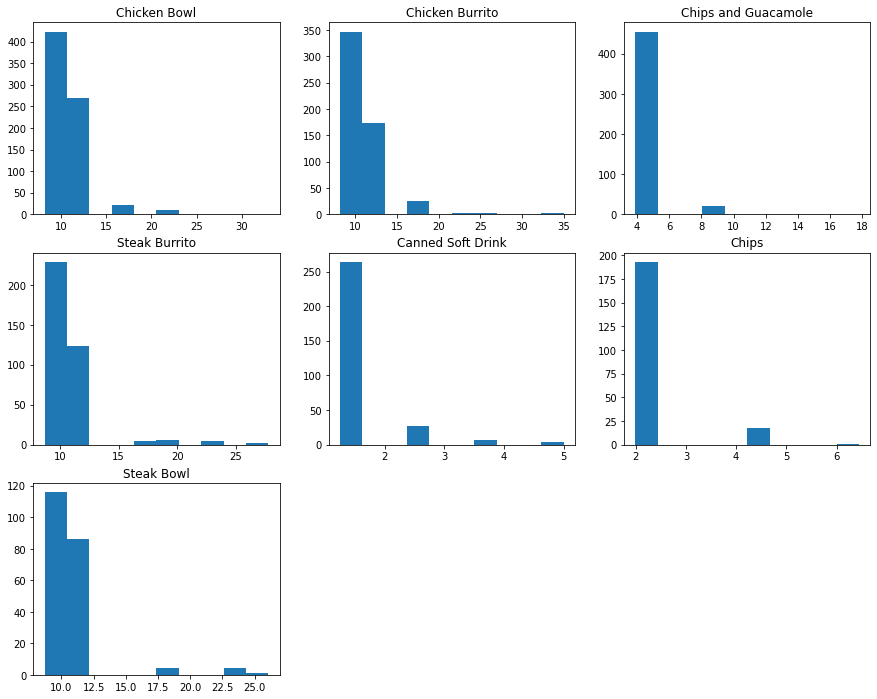

In [100]:
tmp = popular_products_sorted.reset_index()

fig = plt.figure(figsize=(15, 12))
i = 1
for product in tmp.product_name[:7]:
    ax = fig.add_subplot(3, 3, i)
    ax.title.set_text(product)
    plt.hist(df[df.product_name == product].product_price)
    i = i + 1

### 21. Draw a scatterplot with the number of products orderered per transaction price
#### Tips: Price should be in the X-axis and products ordered in the Y-axis

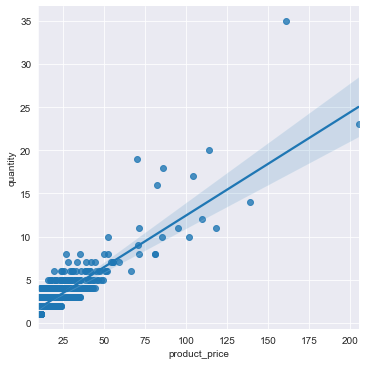

In [102]:
df2 = df.groupby('order_id').sum()
sns.set_style('darkgrid')
sns.lmplot(x = 'product_price', y = 'quantity', data = df2)